In [1]:
"""
chirp.py: Introduction to timing in QUA
Author: Michal Goldenshtein - Quantum Machines
Created: 17/05/2022
"""

from qm import QuantumMachinesManager
from qm.qua import *
from qm import SimulationConfig
import matplotlib.pyplot as plt
from configuration import *

qop_ip = "132.66.210.26"
qmm = QuantumMachinesManager(host=qop_ip)


2025-11-03 15:34:08,571 - qm - INFO     - Starting session: a87ecae9-d5e4-4162-b938-d2ecb5572d66
2025-11-03 15:34:08,901 - qm - INFO     - Performing health check
2025-11-03 15:34:08,909 - qm - INFO     - Health check passed


2025-11-03 15:35:14,787 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


2025-11-03 15:35:15,215 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


2025-11-03 15:35:16,105 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


2025-11-03 15:35:17,013 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


2025-11-03 15:35:18,083 - qm - INFO     - Simulating program


/Users/korrenhannes/opx_qua_course/qua-libs/venv_opx_qua_course/lib/python3.11/site-packages/qm/program/_qua_config_schema.py:1880: DeprecationWarning: 'version' is deprecated since "1.2.2" and will be removed in "1.3.0". Please remove it from the Qua config.
  warnings.warn(


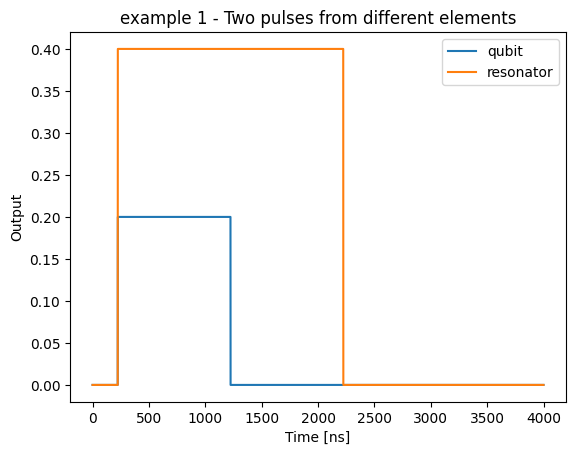

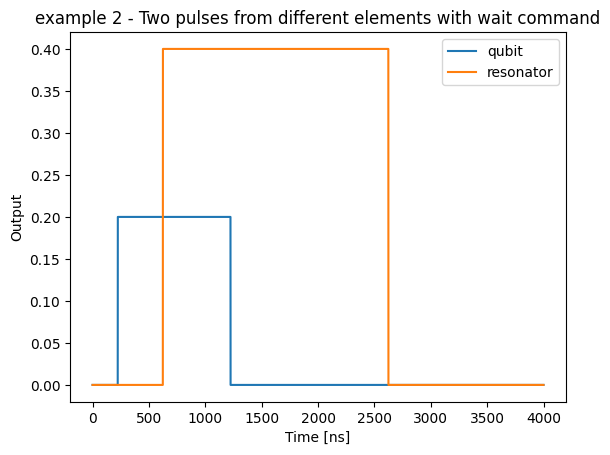

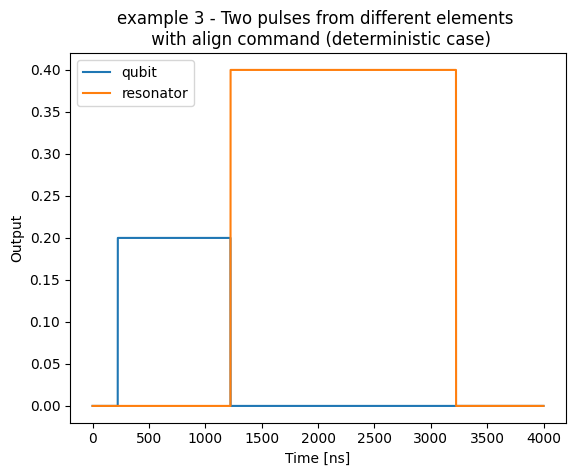

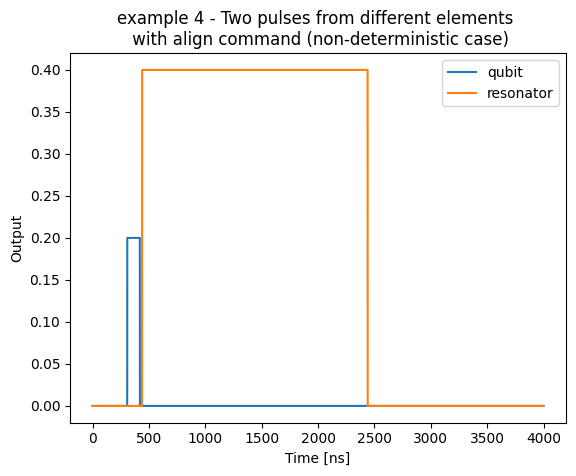

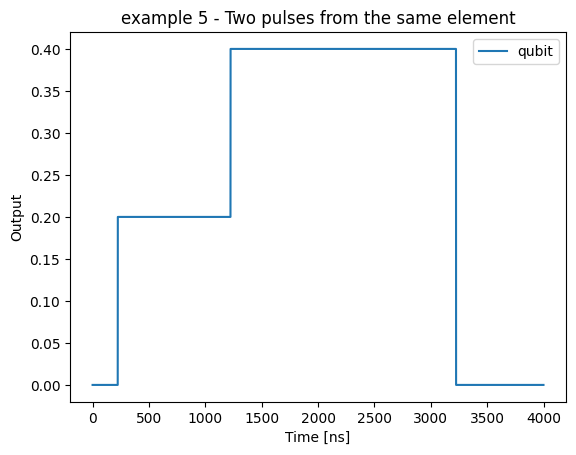

In [3]:

with program() as example1:
    play("cw1", "qubit")
    play("cw2", "resonator")

with program() as example2:
    play("cw1", "qubit")
    wait(100)
    play("cw2", "resonator")

with program() as example3:
    play("cw1", "qubit")
    align("qubit", "resonator")
    play("cw2", "resonator")

with program() as example4:
    t = Random()
    play("cw1", "qubit", duration=4 * t.rand_int(50))
    align("qubit", "resonator")
    play("cw2", "resonator")

with program() as example5:
    play("cw1", "qubit")
    play("cw2", "qubit")

# Simulate and plot 1st example
job = qmm.simulate(config, example1, SimulationConfig(int(1000)))  # in clock cycles, 4 ns
samples = job.get_simulated_samples()

plt.figure(1)
samples.con1.plot()
plt.title("example 1 - Two pulses from different elements")
plt.legend(["qubit", "resonator"])

# Simulate and plot 2nd example
job = qmm.simulate(config, example2, SimulationConfig(int(1000)))  # in clock cycles, 4 ns
samples = job.get_simulated_samples()

plt.figure(2)
samples.con1.plot()
plt.title("example 2 - Two pulses from different elements with wait command")
plt.legend(["qubit", "resonator"])

# Simulate and plot 3rd example
job = qmm.simulate(config, example3, SimulationConfig(int(1000)))  # in clock cycles, 4 ns
samples = job.get_simulated_samples()

plt.figure(3)
samples.con1.plot()
plt.title("example 3 - Two pulses from different elements \n with align command (deterministic case)")
plt.legend(["qubit", "resonator"])

# Simulate and plot 4th example
job = qmm.simulate(config, example4, SimulationConfig(int(1000)))  # in clock cycles, 4 ns
samples = job.get_simulated_samples()

plt.figure(4)
samples.con1.plot()
plt.title("example 4 - Two pulses from different elements \n with align command (non-deterministic case)")
plt.legend(["qubit", "resonator"])

# Simulate and plot 5th example
job = qmm.simulate(config, example5, SimulationConfig(int(1000)))  # in clock cycles, 4 ns
samples = job.get_simulated_samples()

plt.figure(5)
# plot all available channels for this simulation (avoids KeyError for missing specific channel names)
samples.con1.plot()
plt.title("example 5 - Two pulses from the same element")
plt.legend(["qubit"])
